# <span style = "color:green; font-size:40px">Cats & Dogs Classification with CNN</span>

***

Deep learning is a very significant subset of machine learning because of its high performance across various domains. Convolutional Neural Network (CNN), is a powerful image processing deep learning type often using in computer vision that comprises an image and video recognition along with a recommender system and natural language processing ( NLP).

CNN uses a multilayer system consists of the input layer, output layer, and a hidden layer that comprises multiple convolutional layers, pooling layers, fully connected layers.

#### We will be building a convolutional neural network that will be trained on a few thousand images of cats and dogs, and later be able to predict if the given image is of a cat or a dog.

![title](1.gif)

We are going to use <b>Keras</b> deep learning library in python to build our CNN.

The process of building a Convolutional Neural Network always involves four major steps.

1. Convolution
2. Pooling
3. Flattening
4. Full Connection

## About the dataset

The dataset contains images of cats and dogs with each category holding about 100 images.

### Import necessary libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.utils import shuffle
from skimage.transform import resize
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
import glob

### Fetch the Training data

#### <span style = "color:purple">The glob module is used to retrieve files/pathnames matching a specified pattern.</span>

In [40]:
cats = glob.glob('cat and dog/training_set/cats/*.jpg')
dogs = glob.glob('cat and dog/training_set/dogs/*.jpg')

### Fetch the testing data

In [41]:
cats_test = glob.glob('cat and dog/test_set/cats/*.jpg')
dogs_test = glob.glob('cat and dog/test_set/cats/*.jpg')

### Check the Number of images of Cats and Dogs in Training ,Testing Set

In [42]:
print("Number of images in Training are, Cats:",len(cats),",Dogs:",len(dogs))
print("Number of images in Testing are, Cats:",len(cats_test),",Dogs:",len(dogs_test))

Number of images in Training are, Cats: 108 ,Dogs: 107
Number of images in Testing are, Cats: 38 ,Dogs: 38


### Check the datatype of Training and Testing Set(Both Cat and Dog)

In [43]:
print("Datatype of Training set, Cats:", type(cats),",Dogs:",type(dogs))
print("Datatype of Testing set, Cats:", type(cats_test),",Dogs:",type(dogs_test))

Datatype of Training set, Cats: <class 'list'> ,Dogs: <class 'list'>
Datatype of Testing set, Cats: <class 'list'> ,Dogs: <class 'list'>


### Create a list with the images and a seperate one with its corresponding labels for both training and testing set

#### Training set

In [44]:
image = []
label = []

for i in cats:
    img = plt.imread(i)
    image.append(img)
    label.append(0)

    
for i in dogs:
    img = plt.imread(i)
    image.append(img)
    label.append(1)

#### Testing set

In [45]:
image_test = []
label_test = []


for i in cats_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(0)

for i in dogs_test:
    img = plt.imread(i)
    image_test.append(img)
    label_test.append(1)

### Shuffle both images and labels

#### <span style = "color:purple">Here, we are using Shuffle module from sklearn utils</span>

#### Training set

In [46]:
image, label = shuffle(image,label, random_state = 100)

#### Testing set

In [47]:
image_test, label_test = shuffle(image_test,label_test, random_state = 100)

### Plot a few images of Both Categories

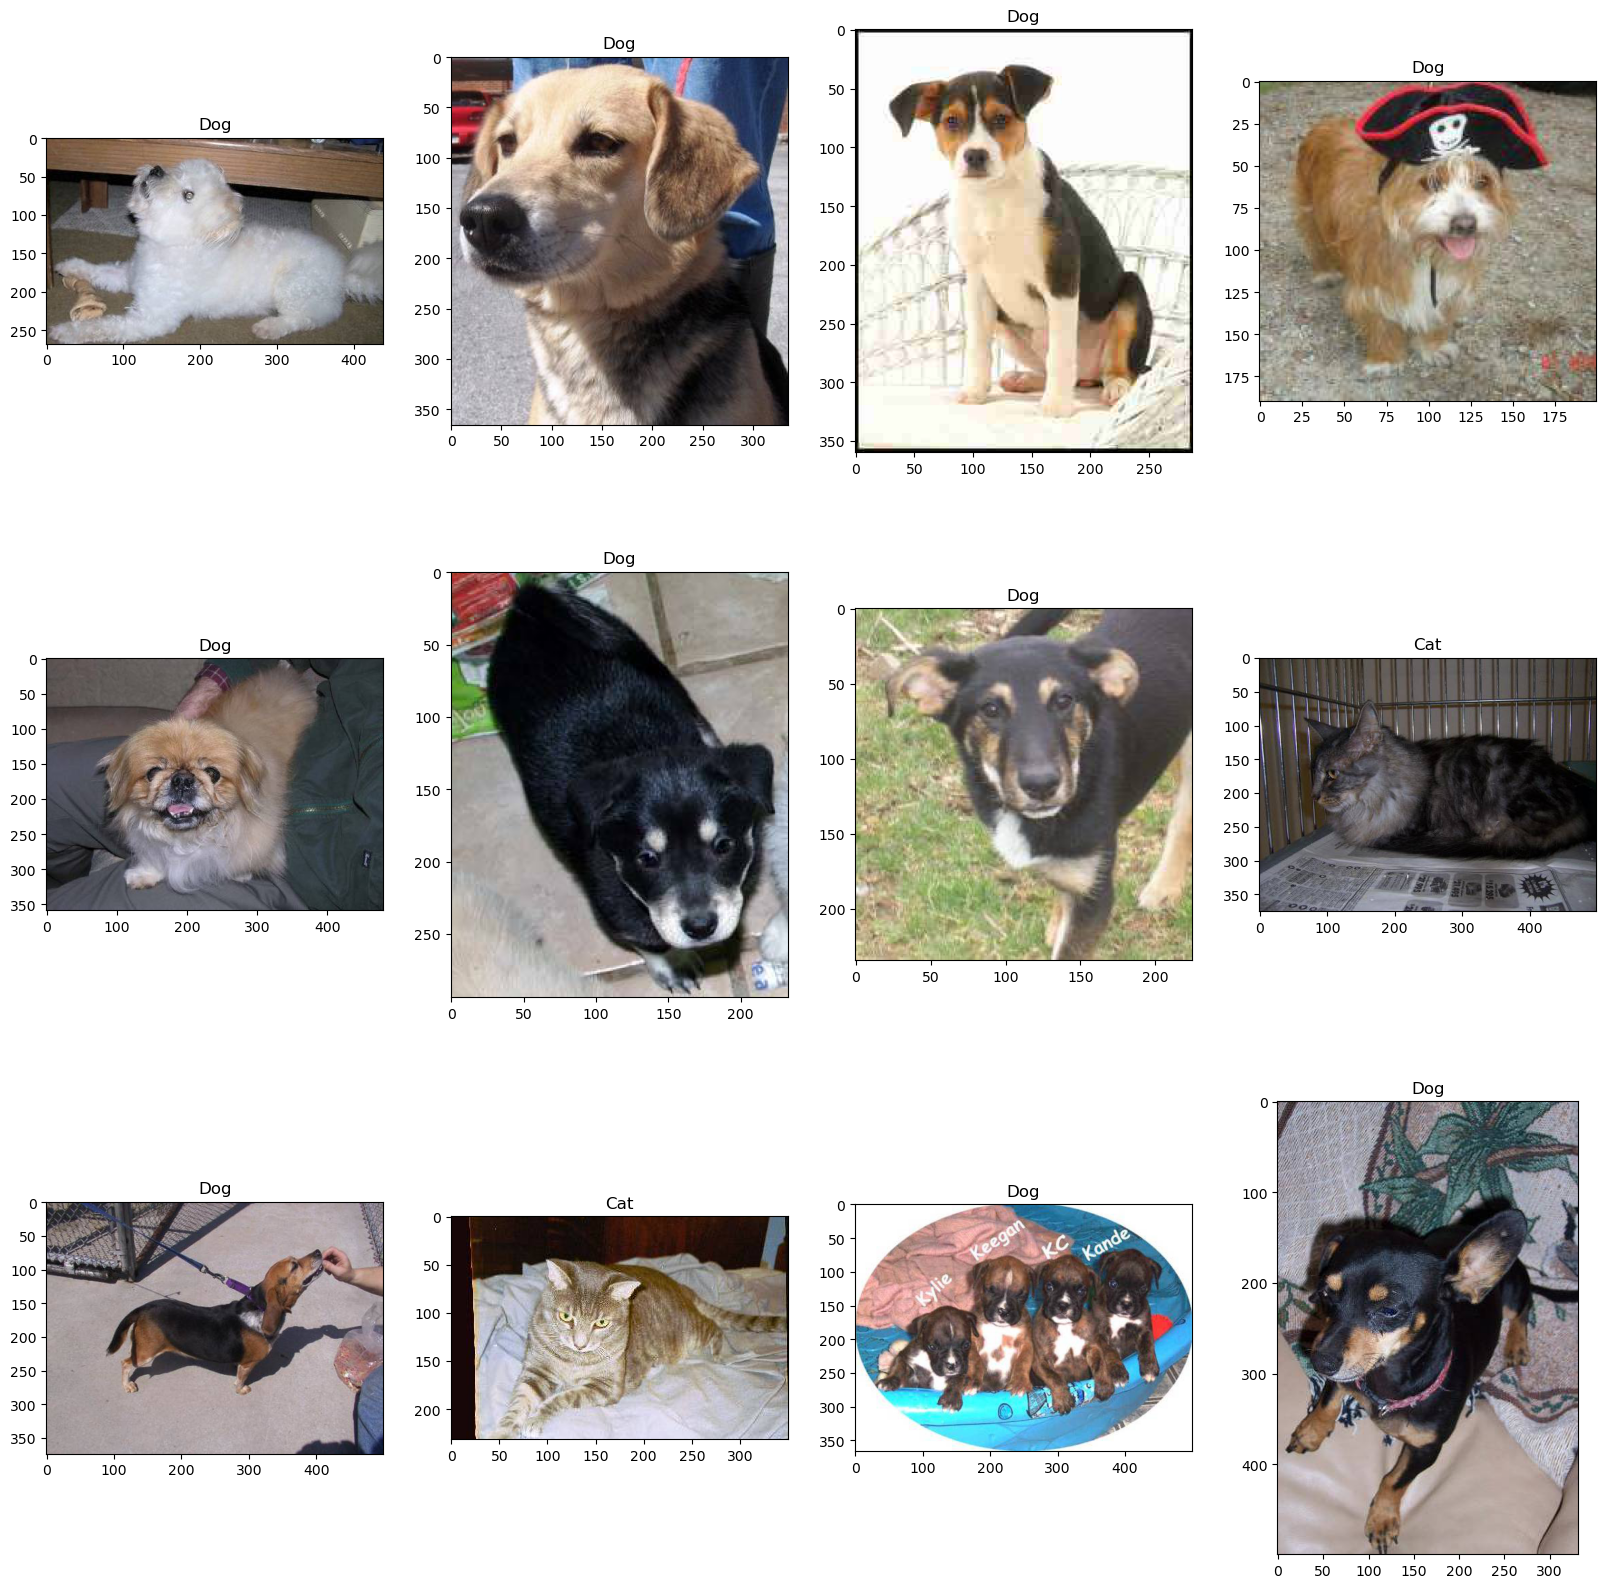

In [48]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    if label[i] == 1:
        plt.title('Dog')
    else:
        plt.title('Cat')

### Resize the images to 64X64

#### <span style = "color:brown">All the images in our dataset are of different dimensions. We need to resize them to a same shape before feeding them to our neural network.</span>
Rescale operation resizes an image by a given scaling factor. The scaling factor can either be a single floating point value, or multiple values - one along each axis. Resize serves the same purpose, but allows to specify an output image shape instead of a scaling factor.

#### Training set

In [49]:
X_train = []

for i in image:
    X_train.append(resize(i,(64,64,3)))
    
X_train = np.array(X_train)

#### Testing set

In [50]:
X_test = []

for i in image_test:
    X_test.append(resize(i,(64,64,3)))
    
X_test = np.array(X_test)

In [51]:
X_test.shape

(76, 64, 64, 3)

In [52]:
y_test.shape

(76,)

### Plot some of the resized images

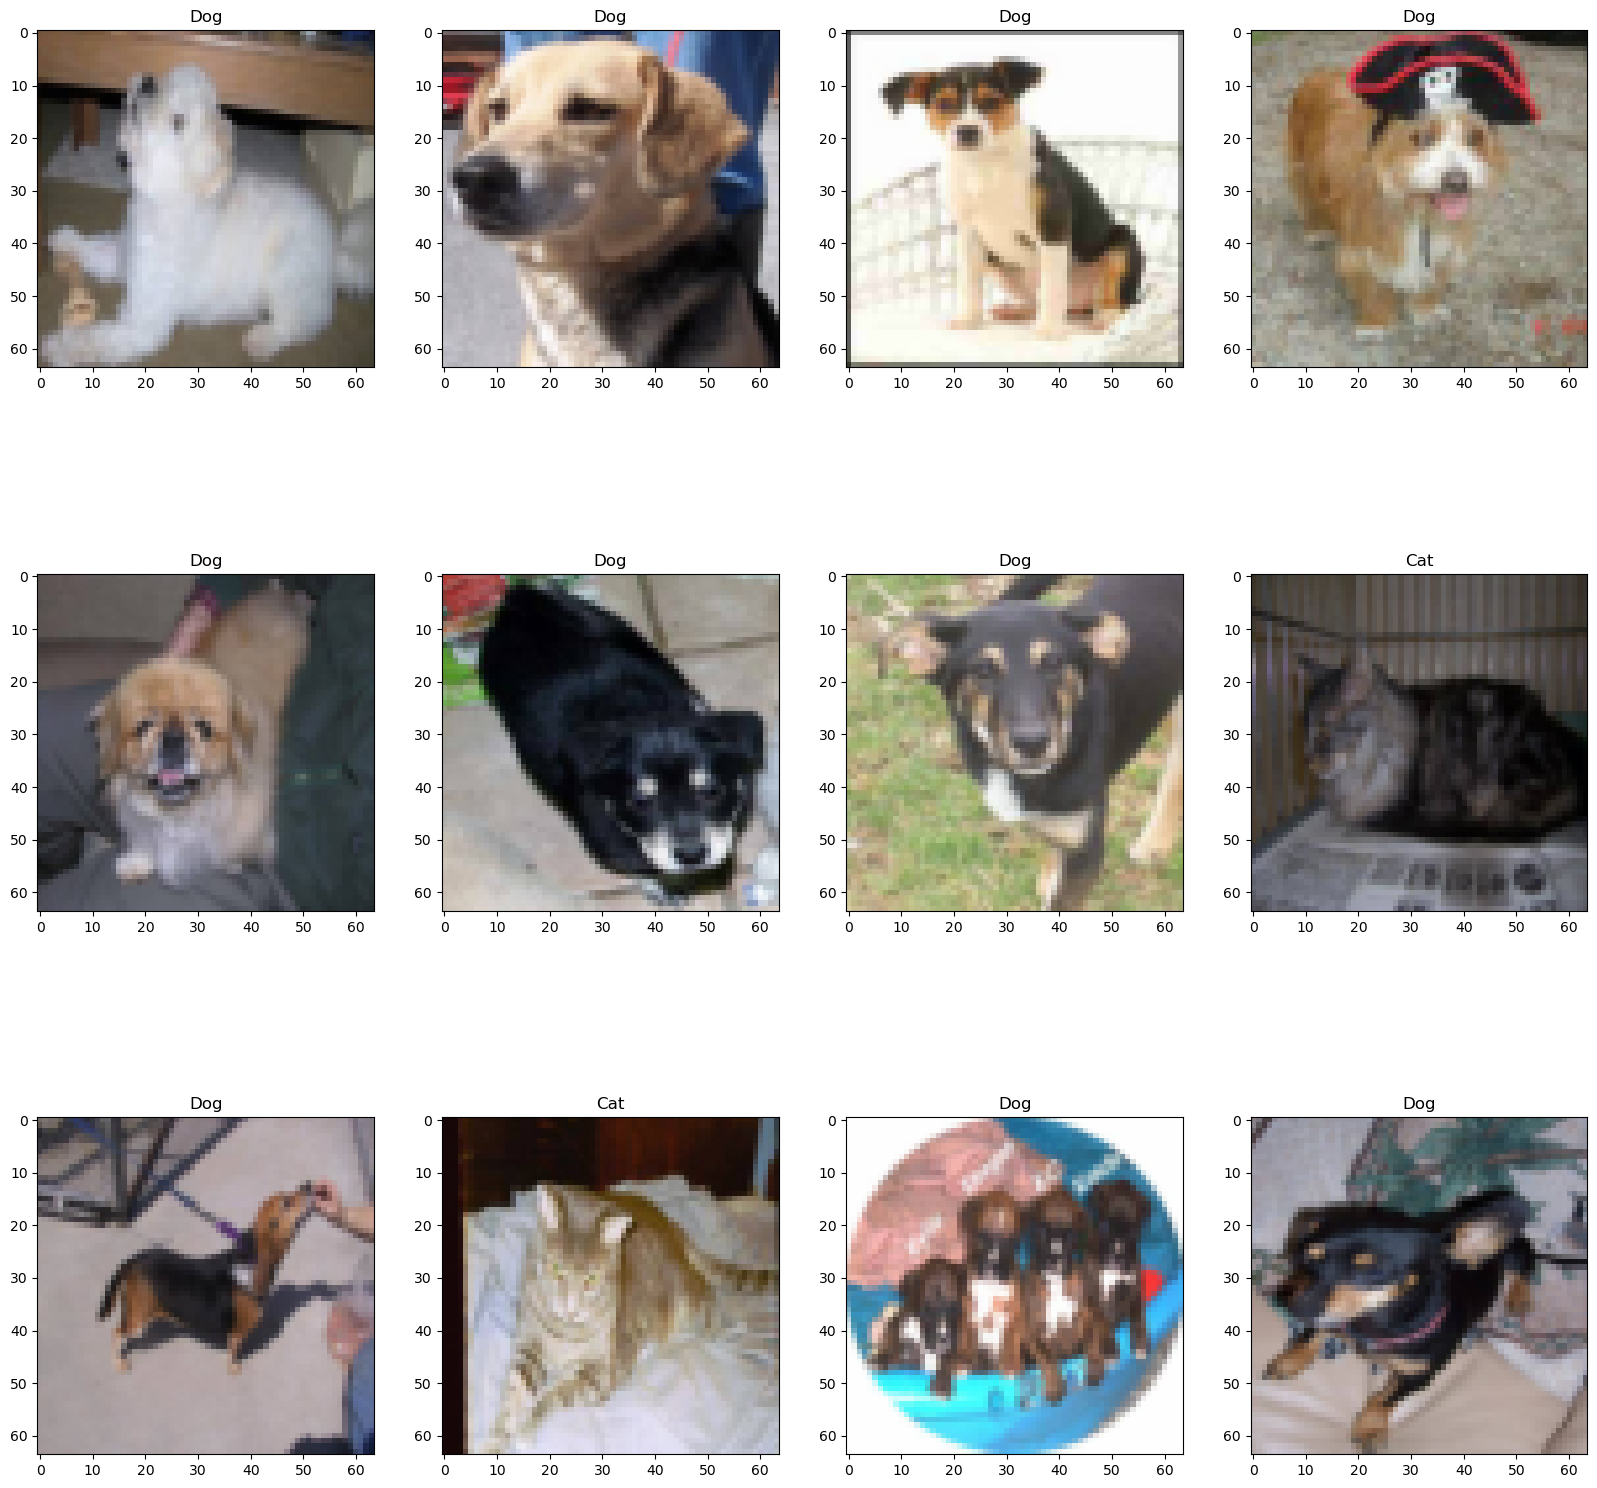

In [53]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_train[i])
    if label[i] == 1:
        plt.title('Dog')
    else:
        plt.title('Cat')

### Check the datatype of X_train and Label

In [54]:
print(type(X_train))
print(type(label))

<class 'numpy.ndarray'>
<class 'list'>


### Convert label and test_label to Numpy array and store it in y_train and y_test

In [55]:
y_train = np.array(label)
y_test = np.array(label_test)

In [56]:
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Check the shape of X_train and y_train

In [57]:
X_train.shape

(215, 64, 64, 3)

In [58]:
y_train.shape

(215,)

### Create Keras Sequential model with 2 convolution layer, Flatten and a Hidden layer

1. We first need to initiate sequential class since there are various layers to build CNN which all must be in sequence. Then we add the first convolutional layer where we need to specify some arguments.
    * The primary purpose of convolution is to find features in the image using a feature detector. Then put them into a feature map, which preserves distinct features of images.Feature detector which is known as a filter also is initialized randomly and then after a lot of iteration, filter matrix parameter selected which will be best for separating images. For instance, animals’ eye, nose, etc. will be considered as a feature which is used for classifying images using filter or feature detectors. Here we are using 16 features.
    * We also need to specify the size of our filter, Here we'll be using (3,3)
    * Activation Function – Relu, Since images are non-linear, to bring non-linearity, the relu activation function is applied after the convolutional operation.Relu stands for Rectified linear activation function. Relu function will output the input directly if it is positive, otherwise, it will output zero.
    *  Input shape - This argument shows image size – 64x64x1,Since the images in RGB format so, the third dimension of the image is 3.
    
2. Pooling Operation
    * We need to apply the pooling operation after initializing CNN. Pooling is an operation of down sampling of the image. The pooling layer is used to reduce the dimensions of the feature maps. Thus, the Pooling layer reduces the number of parameters to learn and reduces computation in the neural network.
    
3. Add an additional Convolutional Layer
    * This time with 32 filters. 
    * We specify our filter size as 3x3 same as before
    * Activation Function - Relu
    * (We do not need to specify input shape after the first layer)
    
4. Flattening Operation
    * Flattening operation is converting the dataset into a 1-D array for input into the next layer which is the fully connected layer.
    
5. Fully Connected layer and output layer
    * The output of the flattening operation work as input for the neural network. The aim of the artificial neural network makes the convolutional neural network more advanced and capable enough of classifying images.
    * Here we are using a dense class from the Keras library from creating a fully connected layer and output layer.
    * The sigmoid activation function is used for building the output layer.

In [59]:
model = RandomForestClassifier()

In [78]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (64, 64, 3)),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Conv2D(32,(3,3), activation = 'relu'),
    keras.layers.MaxPool2D(2,2),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(64, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

### Compile our model

In [79]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

### Check model summary

In [80]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 62, 62, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 31, 31, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 29, 29, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │         401,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 406,625 (1.55 MB)

 Trainable params: 406,625 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

### Train our model with X_train and y_train

* The number of <b>epochs</b> is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.
* <b>steps_per_epoch</b> is batches of samples to train. It is used to define how many batches of samples to use in one epoch. It is used to declaring one epoch finished and starting the next epoch.
* Keras can separate a portion of your training data into a validation dataset and evaluate the performance of your model on that validation dataset each epoch. You can do this by setting the <b>validation_split</b> argument on the fit() function to a percentage of the size of your training dataset.

In [81]:
model.fit(X_train,y_train, epochs=30, steps_per_epoch=3, validation_split=0.1)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 188ms/step - accuracy: 0.5768 - loss: 0.6881 - val_accuracy: 0.3182 - val_loss: 0.8893
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3182 - val_loss: 0.8893
Epoch 3/30
1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.5846 - loss: 0.6834

C:\Users\smart\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.5341 - loss: 0.7185 - val_accuracy: 0.3182 - val_loss: 0.7262
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3182 - val_loss: 0.7262
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5826 - loss: 0.6758 - val_accuracy: 0.6364 - val_loss: 0.6777
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6364 - val_loss: 0.6777
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.6334 - loss: 0.6737 - val_accuracy: 0.3182 - val_loss: 0.7272
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3182 - val_loss: 0.7272
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.5470 - loss: 0.6506 - val_accuracy: 0.3636 - val_loss: 0.7346
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.36

### Evaluate our model

In [64]:
model.evaluate(X_train, y_train)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8516 - loss: 0.4048 


[0.4576406478881836, 0.804651141166687]

### Make predictions with X_test

In [65]:
prediction = model.predict(X_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [66]:
prediction[:5]

array([[0.46289778],
       [0.5885968 ],
       [0.7121935 ],
       [0.5875523 ],
       [0.48842165]], dtype=float32)

#### Our prediction is numbers ranging from 0 to 1. We can convert values less than 0.5 to 0 and rest to 1.

In [67]:
pred = []

for i in prediction:
    if i > 0.5:
        pred.append(1)
    else:
        pred.append(0)

In [68]:
pred

[0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0]

### Plot X_test along with label from our prediction

In [69]:
label_dict={0:'Cat',1:'Dog'}

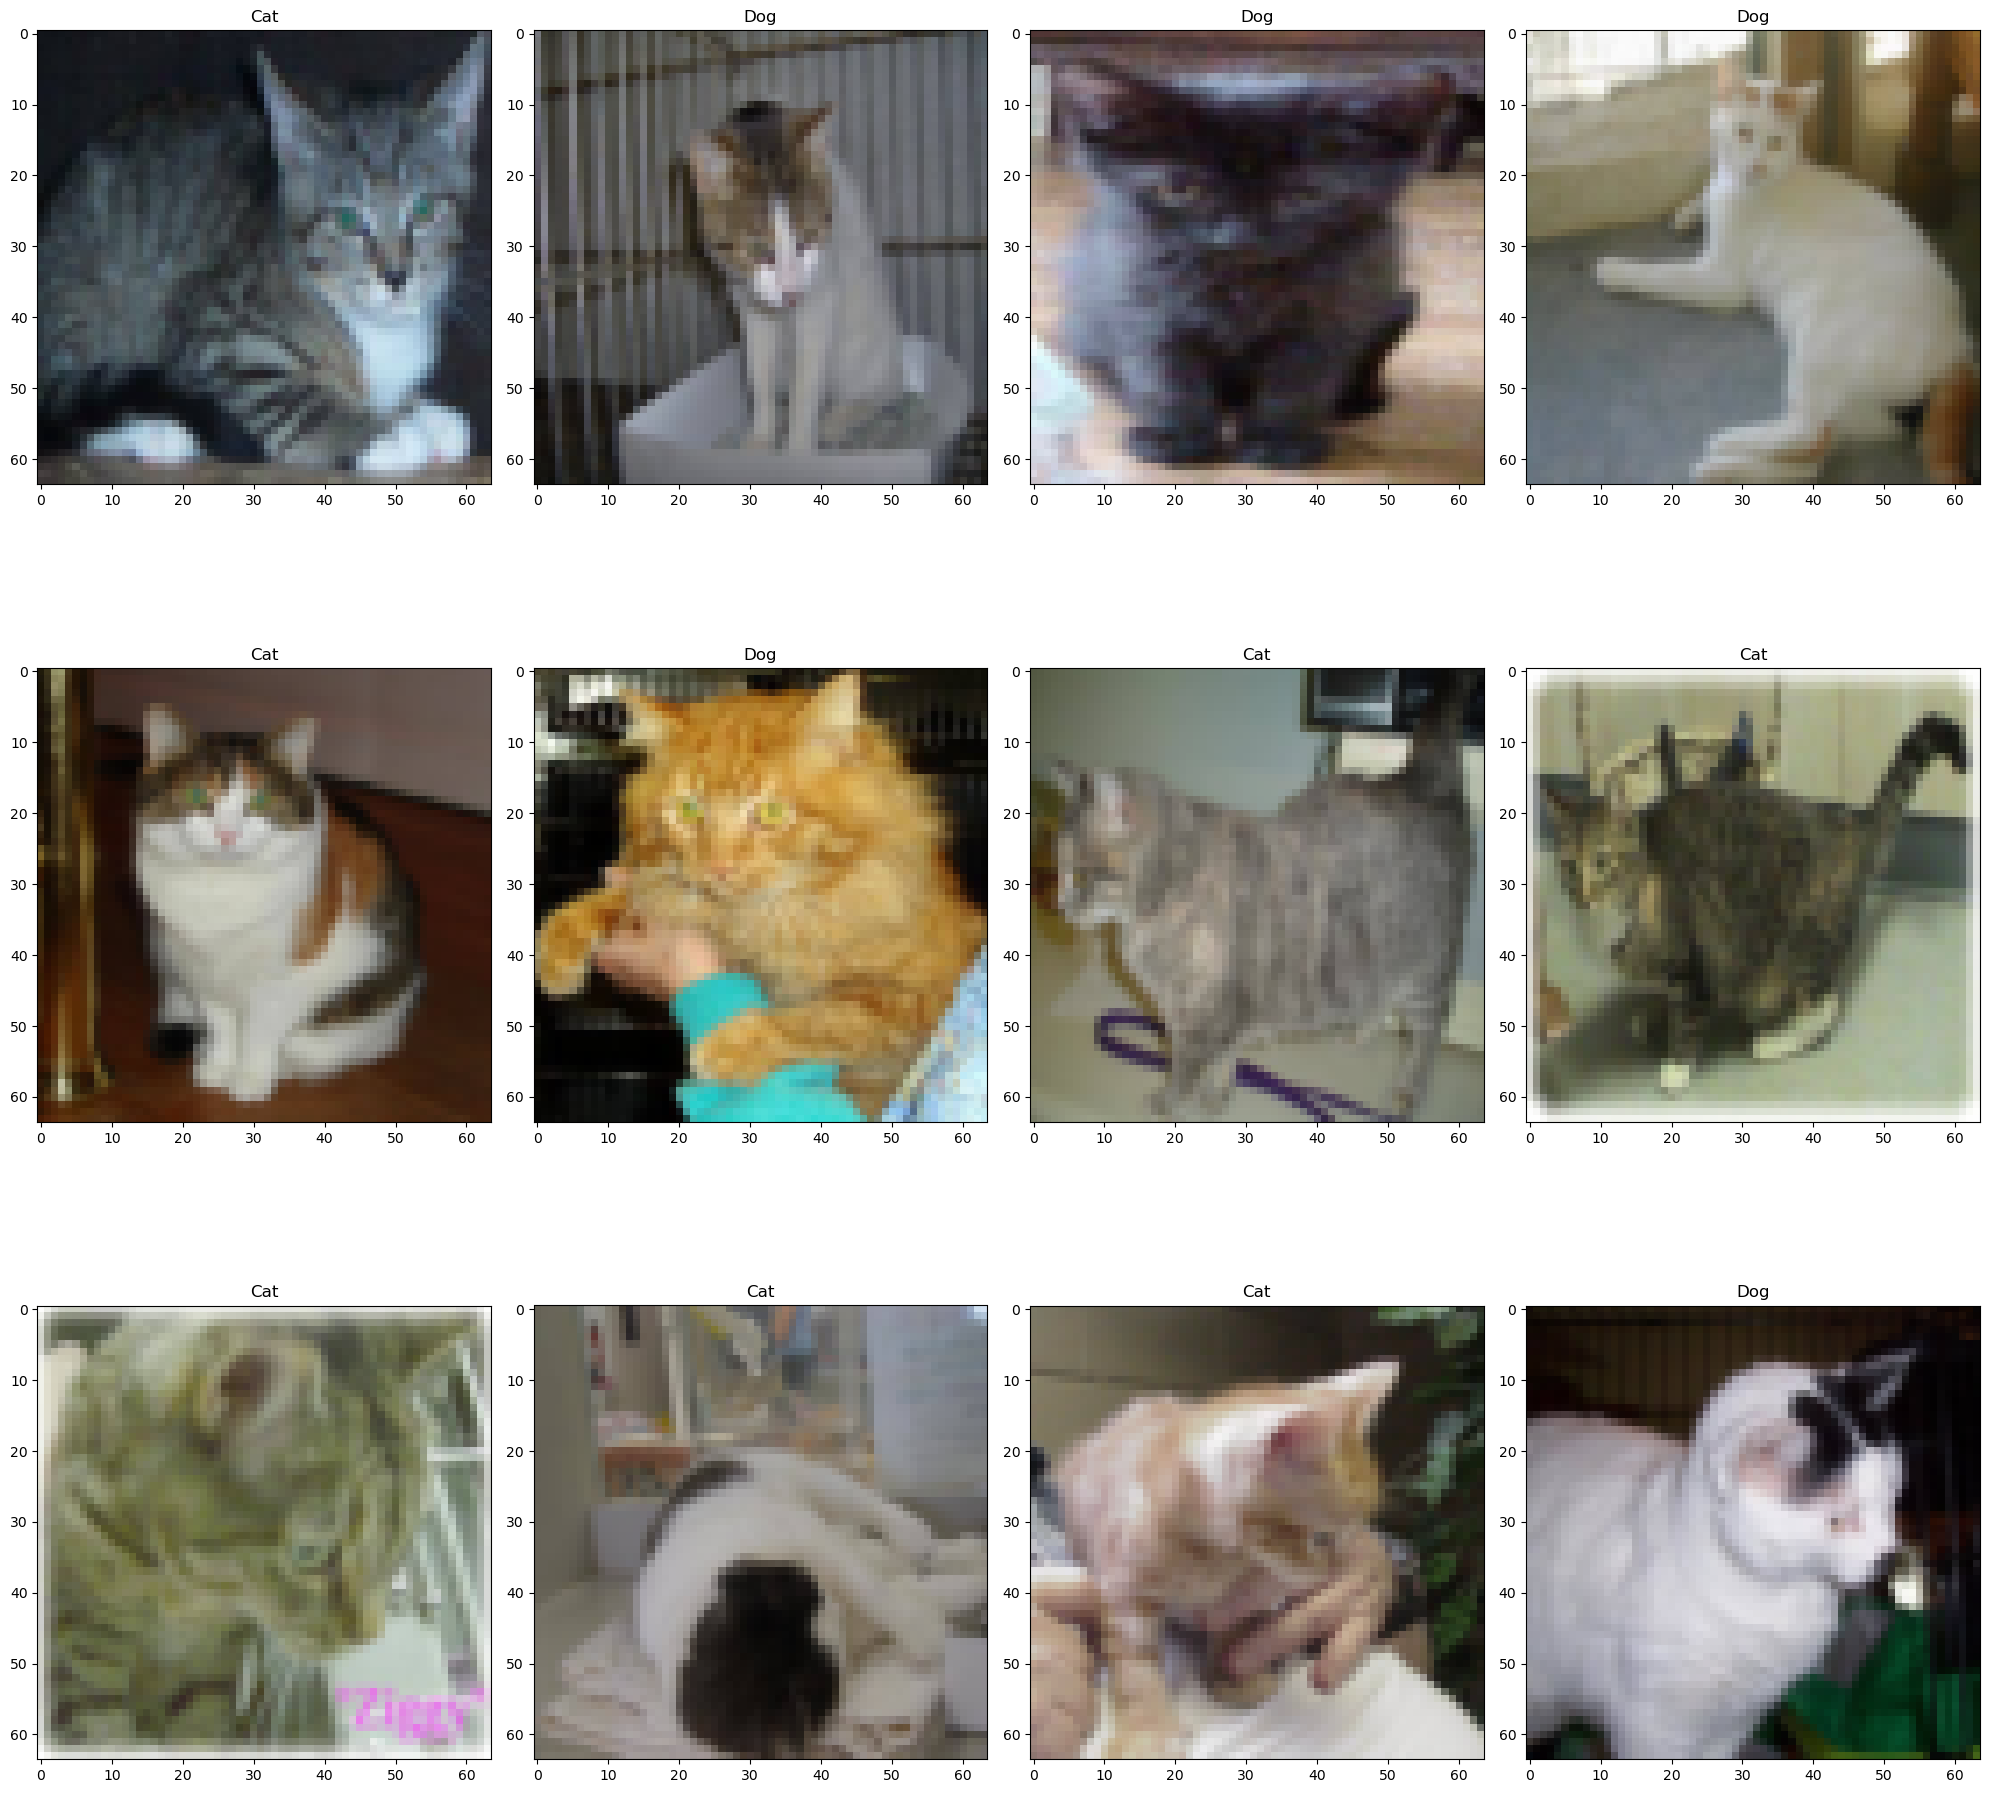

In [70]:
plt.figure(figsize = (20,20))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[i])
    plt.title(label_dict[pred[i]])
plt.tight_layout()

### Plot confusion matrix on a heatmap

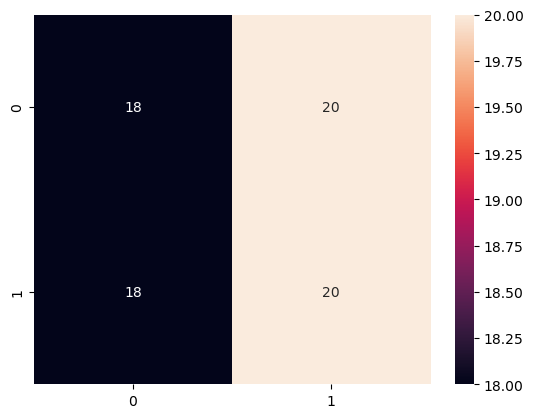

In [71]:
sns.heatmap(confusion_matrix(y_test,pred), annot = True)
plt.show()

***

# <span style = "color:coral">Method 2: Using ImageDataGenerator</span>

Keras has this ImageDataGenerator class which allows the users to perform image augmentation on the fly in a very easy way.The ImageDataGenerator class has three methods flow(), flow_from_directory() and flow_from_dataframe() to read the images from a big numpy array and folders containing images.

We will be using flow_from_directory to fetch images from folders.

### Import all necessary libraries

In [1010]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Create ImageDataGenerator objects for train,test and validation set

#### <span style = "color:purple">Normalise the image datas with rescale (Divide by 255)</span>

In [992]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)
val_set = ImageDataGenerator(rescale = 1/255)

### Fetch datas from the directory

Here are the most used attributes along with the flow_from_directory() method.
* The target_size is the size of your input images, every image will be resized to this size.
* batch_size: No. of images to be yielded from the generator per batch.
* class_mode: Set “binary” if you have only two classes to predict, if not set to“categorical”, in case if you’re developing an Autoencoder system, both input and the output would probably be the same image, for this case set to “input”.

In [993]:
training_set = train_datagen.flow_from_directory('cat and dog/training_set',
                                                target_size=(64,64),
                                                batch_size=32,
                                                class_mode='binary')
test_set = test_datagen.flow_from_directory('cat and dog/test_set',
                                           target_size=(64,64),
                                           batch_size=32,
                                           class_mode='binary')
val_set = test_datagen.flow_from_directory('cat and dog/val_set',
                                           target_size=(64,64),
                                           batch_size=32,
                                           class_mode='binary')

Found 215 images belonging to 2 classes.
Found 94 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


### Check the class indices in all 3 data sets(Training, Testing & Validation)

#### Training

In [994]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

#### Testing

In [996]:
test_set.class_indices

{'cats': 0, 'dogs': 1}

#### Validation

In [997]:
val_set.class_indices

{'cats': 0, 'dogs': 1}

### Create Keras Sequential model with 2 Convolution, Flatten and Dense layers

1. We first need to initiate sequential class since there are various layers to build CNN which all must be in sequence. Then we add the first convolutional layer where we need to specify some arguments.
    * The primary purpose of convolution is to find features in the image using a feature detector. Then put them into a feature map, which preserves distinct features of images.Feature detector which is known as a filter also is initialized randomly and then after a lot of iteration, filter matrix parameter selected which will be best for separating images. For instance, animals’ eye, nose, etc. will be considered as a feature which is used for classifying images using filter or feature detectors. Here we are using 16 features.
    * We also need to specify the size of our filter, Here we'll be using (3,3)
    * Activation Function – Relu, Since images are non-linear, to bring non-linearity, the relu activation function is applied after the convolutional operation.Relu stands for Rectified linear activation function. Relu function will output the input directly if it is positive, otherwise, it will output zero.
    *  Input shape - This argument shows image size – 64x64x1,Since the images in RGB format so, the third dimension of the image is 3.
    
2. Pooling Operation
    * We need to apply the pooling operation after initializing CNN. Pooling is an operation of down sampling of the image. The pooling layer is used to reduce the dimensions of the feature maps. Thus, the Pooling layer reduces the number of parameters to learn and reduces computation in the neural network.
    
3. Add an additional Convolutional Layer
    * This time with 32 filters. 
    * We specify our filter size as 3x3 same as before
    * Activation Function - Relu
    * (We do not need to specify input shape after the first layer)
    
4. Flattening Operation
    * Flattening operation is converting the dataset into a 1-D array for input into the next layer which is the fully connected layer.
    
5. Fully Connected layer and output layer
    * The output of the flattening operation work as input for the neural network. The aim of the artificial neural network makes the convolutional neural network more advanced and capable enough of classifying images.
    * Here we are using a dense class from the Keras library from creating a fully connected layer and output layer.
    * The sigmoid activation function is used for building the output layer.

In [998]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape = (64,64,3),activation = 'relu'),
    keras.layers.MaxPool2D(pool_size = (2,2)),
    
    keras.layers.Conv2D(32, (3,3), activation = ('relu')),
    keras.layers.MaxPool2D(pool_size = (2,2)),
    
    keras.layers.Flatten(),
    
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

### Compile our model

In [1000]:
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

### Check model summary

In [1001]:
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_49 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_49 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_54 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_55 (Dense)             (None, 1)               

### Train the model using training set

* The number of <b>epochs</b> is a hyperparameter of gradient descent that controls the number of complete passes through the training dataset.
* <b>steps_per_epoch</b> is batches of samples to train. It is used to define how many batches of samples to use in one epoch. It is used to declaring one epoch finished and starting the next epoch.
* <b>val_data</b>: A validation dataset is a sample of data held back from training your model that is used to give an estimate of model skill while tuning model’s hyperparameters.

Note: We are not using validation split here because validation split doesn't work while passing a generator to train the data.

In [1002]:
model.fit(training_set,
          steps_per_epoch=3,
          validation_data=val_set,
          epochs = 30)

Epoch 1/30
3/3 [==============================] - 1s 465ms/step - loss: 0.6760 - accuracy: 0.5517 - val_loss: 0.8359 - val_accuracy: 0.5000
Epoch 2/30
3/3 [==============================] - 1s 284ms/step - loss: 0.7170 - accuracy: 0.5057 - val_loss: 0.7275 - val_accuracy: 0.5417
Epoch 3/30
3/3 [==============================] - 1s 269ms/step - loss: 0.6700 - accuracy: 0.5312 - val_loss: 0.7365 - val_accuracy: 0.5417
Epoch 4/30
3/3 [==============================] - 1s 323ms/step - loss: 0.6473 - accuracy: 0.5862 - val_loss: 0.6912 - val_accuracy: 0.4583
Epoch 5/30
3/3 [==============================] - 1s 313ms/step - loss: 0.6203 - accuracy: 0.6458 - val_loss: 0.6946 - val_accuracy: 0.5000
Epoch 6/30
3/3 [==============================] - 1s 316ms/step - loss: 0.5897 - accuracy: 0.7396 - val_loss: 0.6722 - val_accuracy: 0.4583
Epoch 7/30
3/3 [==============================] - 1s 297ms/step - loss: 0.5427 - accuracy: 0.8333 - val_loss: 0.6914 - val_accuracy: 0.4583
Epoch 8/30
3/3 [====

### Evaluate our model

In [1006]:
model.evaluate(training_set)

7/7 [==============================] - 1s 188ms/step - loss: 0.1400 - accuracy: 0.99070s - loss: 0.1223 - accura


[0.14003993570804596, 0.9906976819038391]

### Make Prediction with test_set

In [1003]:
prediction = model.predict(test_set)

In [1007]:
prediction[:5]

array([[0.08804023],
       [0.74154806],
       [0.6681956 ],
       [0.19533086],
       [0.005263  ]], dtype=float32)

#### Our prediction is numbers ranging from 0 to 1. We can convert values less than 0.5 to 0 and rest to 1.

In [1004]:
pred = []

for i in prediction:
    if i > 0.5:
        pred.append(0)
    else:
        pred.append(1)

### Check few of the new predicted values

In [1009]:
pred[:10]

[1, 0, 0, 1, 1, 0, 1, 1, 1, 1]

### Alternative way to test

In [1015]:
import numpy as np
from tensorflow.keras.preprocessing import image

In [1028]:
test_image = image.load_img('cat and dog/test_set/dogs/dog.4089.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

In [1035]:
import glob

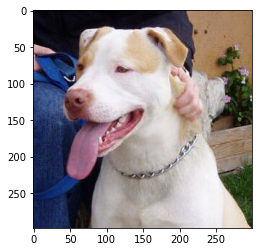

In [1045]:
img = glob.glob('cat and dog/test_set/dogs/dog.4089.jpg')
plt.imshow(plt.imread(img[0]))

In [1030]:
prediction

'dog'

***

## An alternative way to read images in python

In [1031]:
from PIL import Image

In [1049]:
img = Image.open('cat and dog/test_set/dogs/dog.4089.jpg')
img = np.asarray(img) 

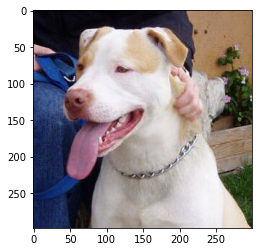

In [1047]:
plt.imshow(img)